In [221]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv('data/avocado.csv')
df = df[["AveragePrice", "Total Volume", "region"]]
df.head()

,AveragePrice,Total Volume,region
0,1.33,64236.62,Albany
1,1.35,54876.98,Albany
2,0.93,118220.22,Albany
3,1.08,78992.15,Albany
4,1.28,51039.60,Albany


In [223]:
df = df.set_index("region")
df.head()

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60


In [224]:
cities = df.loc[["NewYork", "PhoenixTucson","SanFrancisco", "Houston","LosAngeles"]]
cities = cities.reset_index()
#print(cities.groupby('region').size())
cities.head()
cities 

,region,AveragePrice,Total Volume
0,NewYork,1.17,1129876.05
1,NewYork,1.23,1139347.98
2,NewYork,1.12,1254805.29
3,NewYork,1.20,1068971.54
4,NewYork,1.16,999169.64
...,...,...,...
1685,LosAngeles,1.60,100274.88
1686,LosAngeles,1.73,97026.15
1687,LosAngeles,1.75,94441.50
1688,LosAngeles,1.68,106624.63


In [225]:
df_shuffled=sklearn.utils.shuffle(cities)
print(df_shuffled)

            region  AveragePrice  Total Volume
8          NewYork          1.06    2180520.22
950   SanFrancisco          2.01      18541.03
1116       Houston          0.84    1095287.56
1456    LosAngeles          0.88    3212261.75
942   SanFrancisco          2.37      21276.09
...            ...           ...           ...
917   SanFrancisco          2.33      24605.38
1273       Houston          1.18      12965.74
1632    LosAngeles          1.98      62337.67
1261       Houston          1.32      14968.56
713   SanFrancisco          1.33     729890.28

[1690 rows x 3 columns]


In [226]:
cities['region'] = cities['region'].replace(['Houston'],1)
cities['region'] = cities['region'].replace(['LosAngeles'],2)
cities['region'] = cities['region'].replace(['NewYork'],3)
cities['region'] = cities['region'].replace(['PhoenixTucson'],4)
cities['region'] = cities['region'].replace(['SanFrancisco'],5)

In [227]:
cities["region"] = pd.to_numeric(cities["region"])
print(cities.groupby('region').size())

region
1    338
2    338
3    338
4    338
5    338
dtype: int64


In [228]:
cities
df

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60
...,...,...
WestTexNewMexico,1.63,17074.83
WestTexNewMexico,1.71,13888.04
WestTexNewMexico,1.87,13766.76


In [229]:
cities.head()
cities = cities[["AveragePrice", "Total Volume", "region"]]

In [230]:
dataset = cities.values
dataset

array([[1.17000000e+00, 1.12987605e+06, 3.00000000e+00],
       [1.23000000e+00, 1.13934798e+06, 3.00000000e+00],
       [1.12000000e+00, 1.25480529e+06, 3.00000000e+00],
       ...,
       [1.75000000e+00, 9.44415000e+04, 2.00000000e+00],
       [1.68000000e+00, 1.06624630e+05, 2.00000000e+00],
       [1.80000000e+00, 8.75172300e+04, 2.00000000e+00]])

In [231]:
X = dataset[:,0:2]
print(X)
Y = dataset[:,2]
print(Y)

[[1.17000000e+00 1.12987605e+06]
 [1.23000000e+00 1.13934798e+06]
 [1.12000000e+00 1.25480529e+06]
 ...
 [1.75000000e+00 9.44415000e+04]
 [1.68000000e+00 1.06624630e+05]
 [1.80000000e+00 8.75172300e+04]]
[3. 3. 3. ... 2. 2. 2.]


In [242]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [243]:
X_scale

array([[0.25448029, 0.20584139],
       [0.27598566, 0.20757448],
       [0.23655914, 0.22869982],
       ...,
       [0.46236559, 0.01638683],
       [0.43727599, 0.01861599],
       [0.48028674, 0.01511989]])

In [244]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [245]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [264]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1183, 2) (253, 2) (254, 2) (1183,) (253,) (254,)


In [250]:
# building and training neural network

# setting up the architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='softmax'), # neurons
    Dense(32, activation='relu'), # neurons
    Dense(32, activation='softmax'),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

In [265]:
# building and training neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

In [266]:
# configuring it for compiling
model.compile(optimizer='sgd',
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])

In [267]:
# training our model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=45,
          validation_data=(X_val, Y_val))

Epoch 1/45
37/37 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - accuracy: 0.2159 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 2/45
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2078 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 3/45
37/37 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2009 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 4/45
37/37 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2081 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 5/45
37/37 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1866 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 6/45
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1918 - val_loss: 0.0000e+00 - val_accuracy: 0.1858
Epoch 7/45
37/37 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2171 - val_los

In [268]:
model.evaluate(X_test, Y_test)[1] # viewing results

8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1929


0.19291338324546814

In [269]:
print(hist.history)

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'accuracy': [0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.2045646607875824, 0.204564660

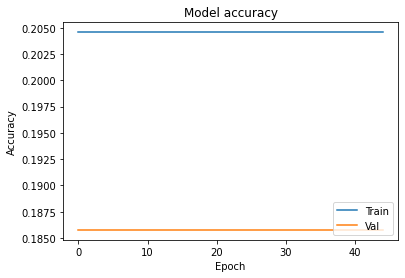

In [270]:
# graphing the accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()